In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as c
import scipy.fftpack as fft
import scipy.ndimage as ndi
import scipy as sp
from PIL import Image

def px_remove(array, x, y):
    temp = array
    temp[y,x]=(temp[y+1,x]+temp[y-1,x]+temp[y,x+1]+temp[y,x-1])/4
    return temp

def px_remove_edge(array, x, y):
    temp = array
    temp[y,x]=(temp[y+1,x]+temp[y-1,x]+temp[y,x-1])/3
    return temp

# SkL Image

/var/folders/gl/y5z38x5d35n864qlp7vb6sx80000gp/T/ipykernel_12077/2884444271.py:18: RuntimeWarning: divide by zero encountered in true_divide
  final = pos/neg


<IPython.core.display.Javascript object>


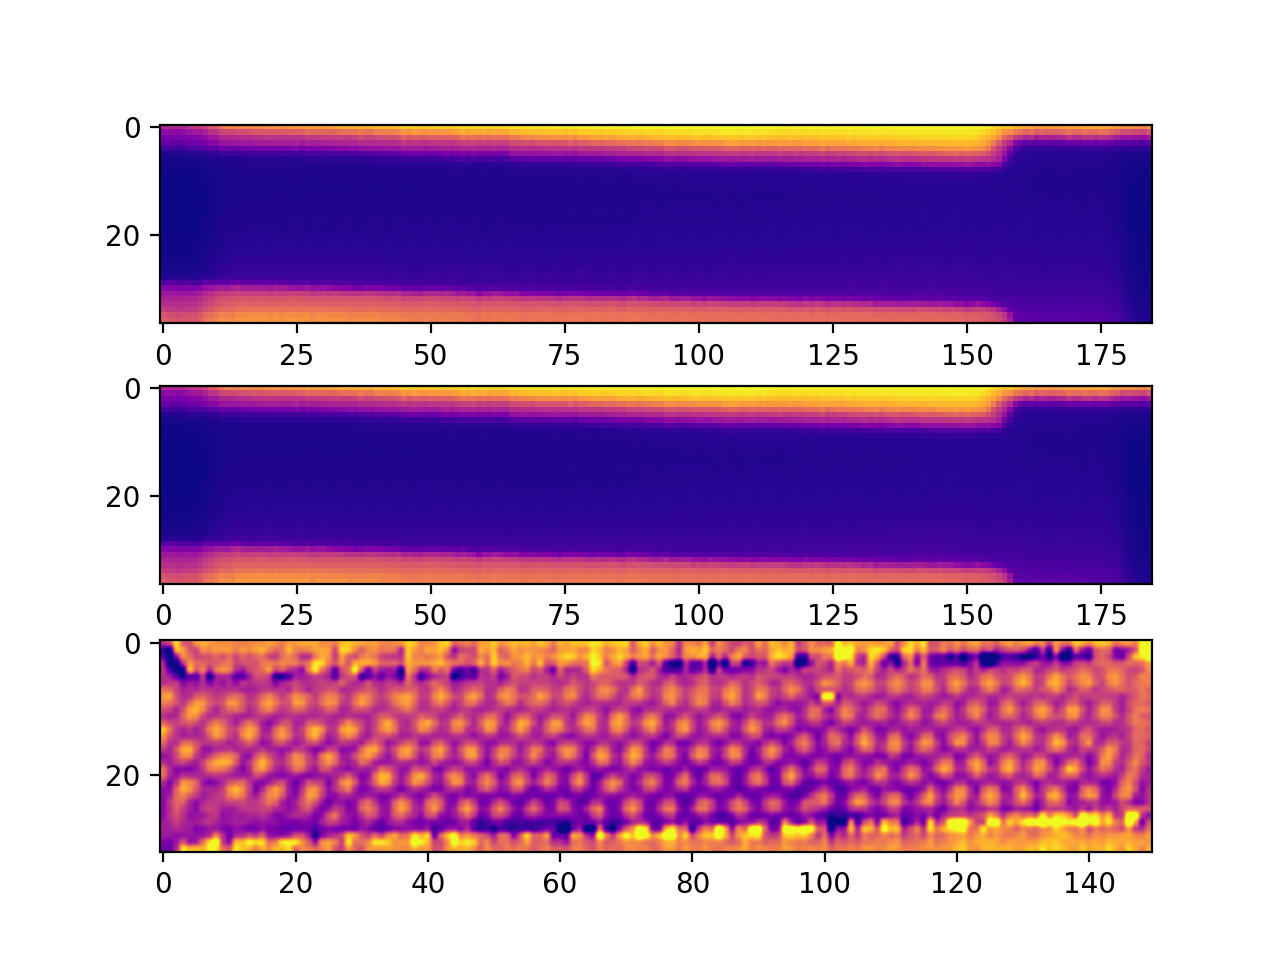

(32, 150)

In [10]:
%matplotlib notebook

date = '210526'
scan_pos = '050'
scan_neg = '051' 

#pos=np.loadtxt('processed/SkL_pos.tif')
#neg=np.loadtxt('processed/SkL_neg.tif')

pos_im = Image.open("STXM_Data/Fig1_Images/SkL_pos.tif")
neg_im = Image.open("STXM_Data/Fig1_Images/SkL_neg.tif")
pos =np.array(pos_im)
neg =np.array(neg_im)

pos = np.rot90(pos)
neg = np.rot90(neg)

final = pos/neg
final_SkL = np.fliplr(final)

### Image ###

plt.figure()
ax2=plt.subplot2grid((3,1),(0,0), rowspan=1,colspan=1)
plt.imshow(pos,cmap='plasma')
ax2=plt.subplot2grid((3,1),(1,0), rowspan=1,colspan=1)
plt.imshow(pos,cmap='plasma')
ax2=plt.subplot2grid((3,1),(2,0), rowspan=1,colspan=1)
plt.imshow(final_SkL[3:-2,24:-11],interpolation='hamming',
           cmap='plasma', vmax= 1.05, vmin= 0.90)

np.shape(final_SkL[3:-2,24:-11])
#plt.colorbar()


# Conical Image

<IPython.core.display.Javascript object>


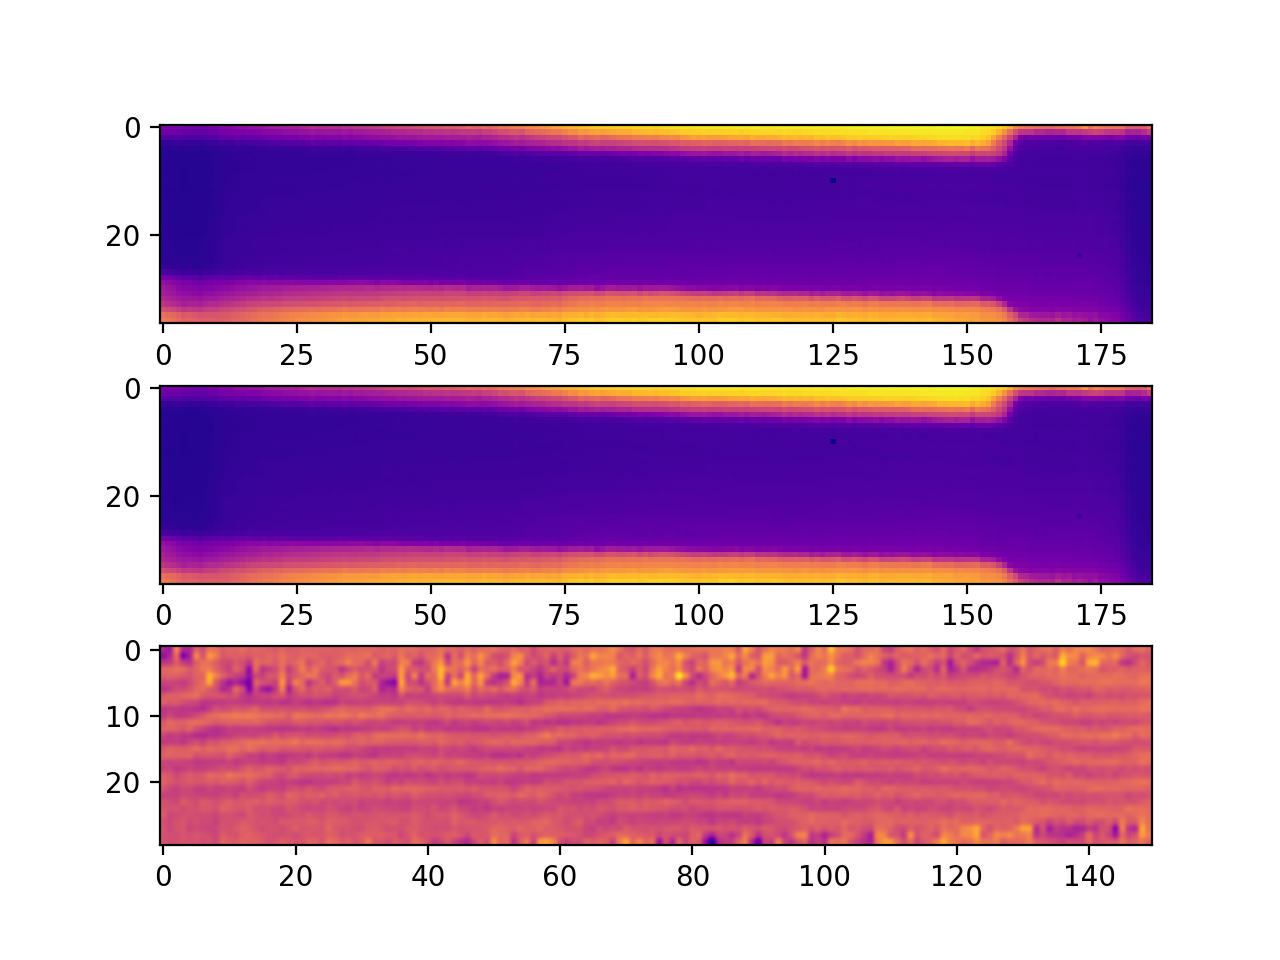

In [11]:
%matplotlib notebook


Reset_list = []


pos_im = Image.open("STXM_Data/Fig1_Images/Con_pos.tif")
neg_im = Image.open("STXM_Data/Fig1_Images/Con_neg.tif")
pos =np.array(pos_im)
neg =np.array(neg_im)

pos = np.rot90(pos)
neg = np.rot90(neg)

final = pos/neg
final = np.fliplr(final)

temp1 = px_remove(final, 59, 10)
final_Con = px_remove(temp1, 74, 22)

### Image ###
%matplotlib notebook
plt.figure()
ax2=plt.subplot2grid((3,1),(0,0), rowspan=1,colspan=1)
plt.imshow(pos,cmap='plasma')
ax2=plt.subplot2grid((3,1),(1,0), rowspan=1,colspan=1)
plt.imshow(pos,cmap='plasma')
ax2=plt.subplot2grid((3,1),(2,0), rowspan=1,colspan=1)
plt.imshow(final_Con[1:-6,20:-15],interpolation='hamming',
           cmap='plasma')




# Helical Image

<IPython.core.display.Javascript object>


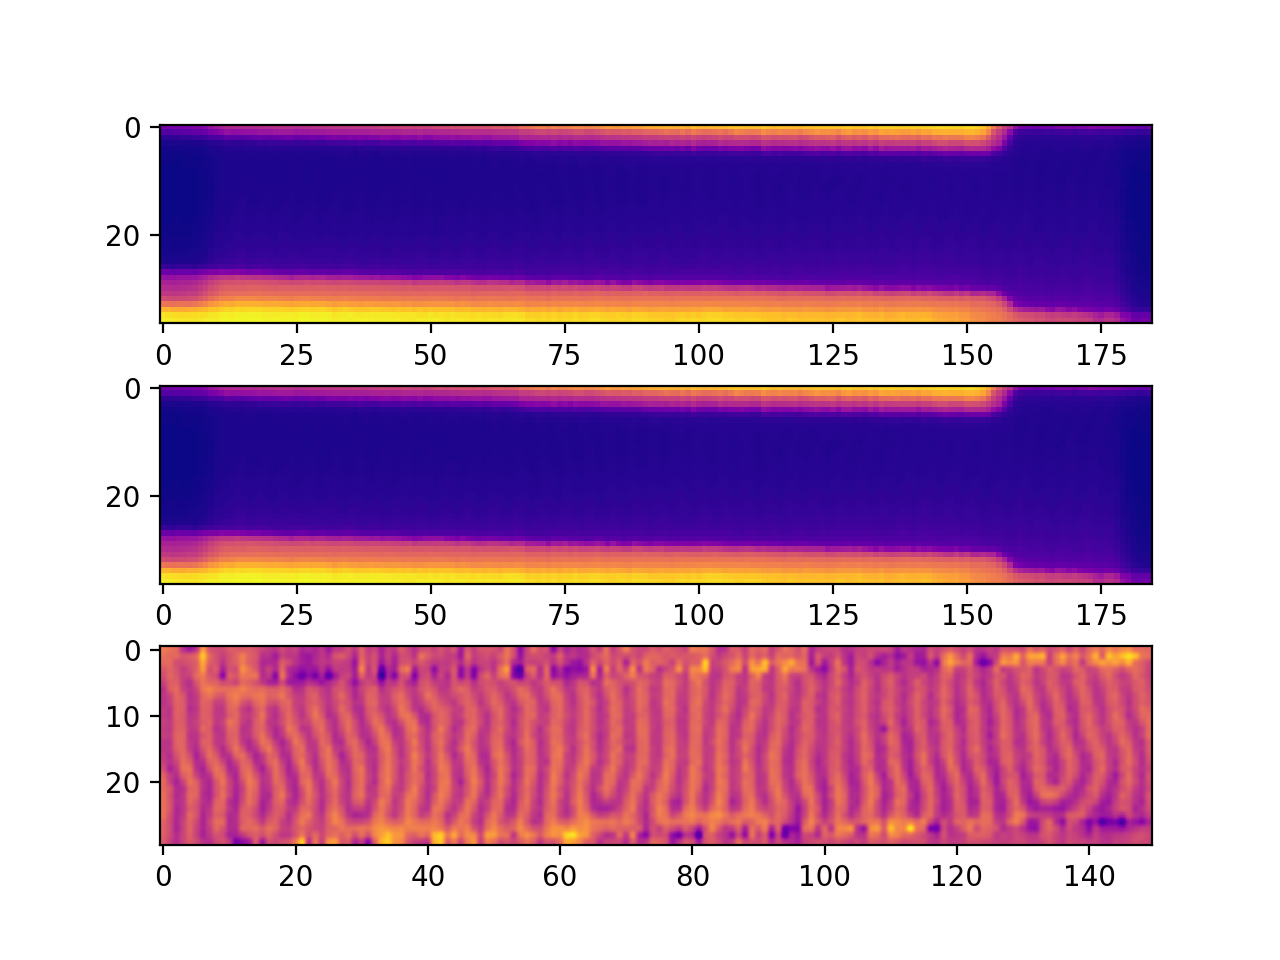

(32, 150)

In [13]:
num = ['0']

pos_im = Image.open("STXM_Data/Fig1_Images/Heli_pos.tif")
neg_im = Image.open("STXM_Data/Fig1_Images/Heli_neg.tif")

pos =np.array(pos_im)
neg =np.array(neg_im)

pos = np.rot90(pos)
neg = np.rot90(neg)

final = pos/neg
final_Hel = np.fliplr(final)


### Image ### 
plt.figure()
ax2=plt.subplot2grid((3,1),(0,0), rowspan=1,colspan=1)
plt.imshow(pos,cmap='plasma')
ax2=plt.subplot2grid((3,1),(1,0), rowspan=1,colspan=1)
plt.imshow(pos,cmap='plasma')
ax2=plt.subplot2grid((3,1),(2,0), rowspan=1,colspan=1)
plt.imshow(final_Hel[1:-6,20:-15],interpolation='hamming',
           cmap='plasma')

#plt.colorbar()
np.shape(final_Hel[:-5,20:-15])

# SkT Image

In [14]:
pos_im = Image.open("STXM_Data/Fig1_Images/SkT_pos.tif")
neg_im = Image.open("STXM_Data/Fig1_Images/SkT_neg.tif")

pos =np.array(pos_im)
neg =np.array(neg_im)

pos = np.rot90(pos)
neg = np.rot90(neg)

final = pos/neg
final_SkS = np.fliplr(final)

<IPython.core.display.Javascript object>


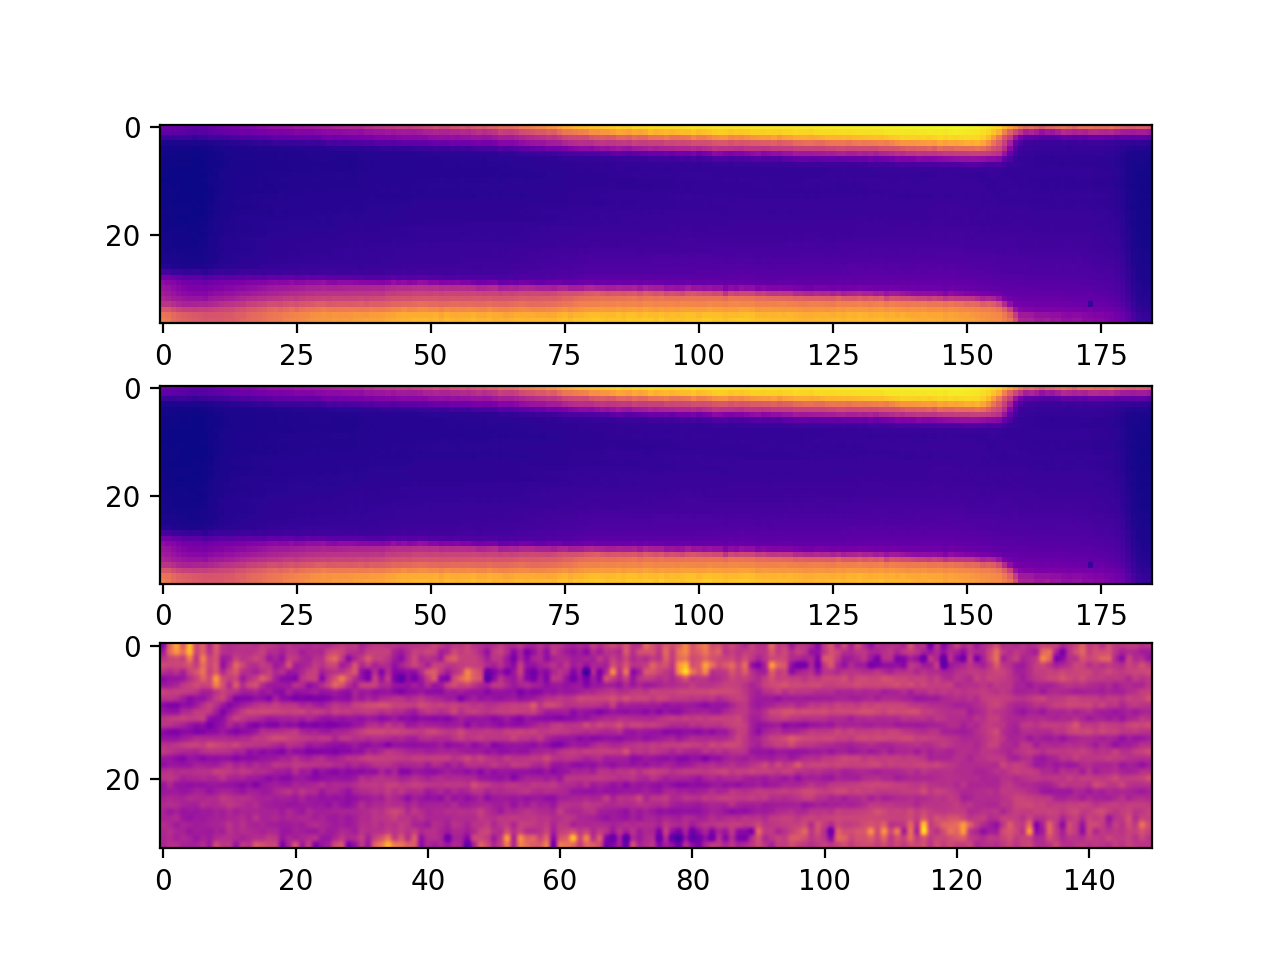

In [16]:
plt.figure()

ax2=plt.subplot2grid((3,1),(0,0), rowspan=1,colspan=1)
plt.imshow(pos,cmap='plasma')
ax2=plt.subplot2grid((3,1),(1,0), rowspan=1,colspan=1)
plt.imshow(pos,cmap='plasma')
ax2=plt.subplot2grid((3,1),(2,0), rowspan=1,colspan=1)
plt.imshow(final_SkS[1:-5,20:-15],interpolation='hamming',
           cmap='plasma')

#plt.colorbar()
#np.shape(final_SkT[1:-5,20:-15])



# Load Sim Data

<IPython.core.display.Javascript object>


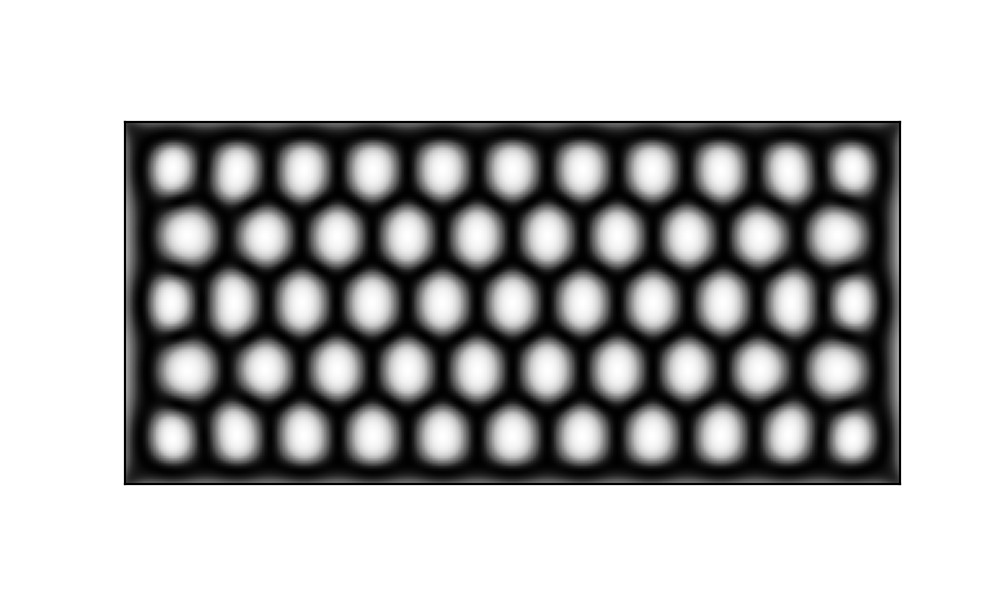

([], [])

In [18]:
sim_SkL = np.fliplr(np.load('STXM_Data/Fig1_Images/Sims/mz_average_anis-x-hard-axis_By_-00120.npy'))

plt.figure(figsize=(5,3))
plt.imshow(sim_SkL,cmap='Greys_r')
plt.xticks([])
plt.yticks([])

<IPython.core.display.Javascript object>


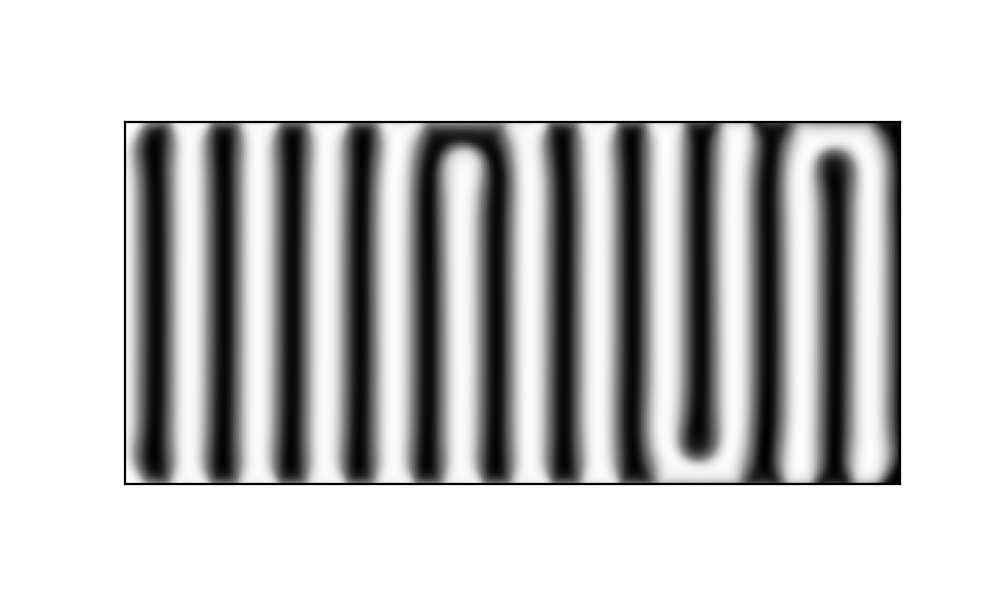

([], [])

In [19]:
heli_data = np.load("STXM_Data/Fig1_Images/Sims/mz_averages_Bzs_ku_-00004_SWEEP-DOWN.npz")

sim_heli = heli_data['-10']

plt.figure(figsize=(5,3))
plt.imshow(sim_heli,cmap='Greys_r')
plt.xticks([])
plt.yticks([])

<IPython.core.display.Javascript object>


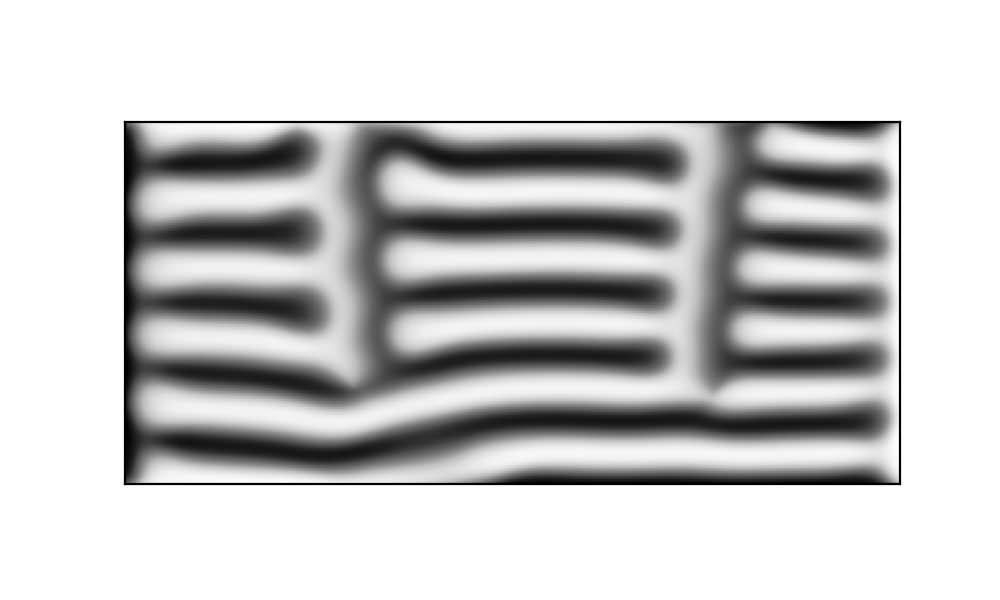

([], [])

In [20]:
SkT_data = np.load("STXM_Data/Fig1_Images/Sims/mz_averages_Bzs_ku_-00004_SWEEP-DOWN.npz")

sim_SkT = np.fliplr(SkT_data['-65'])

plt.figure(figsize=(5,3))
plt.imshow(sim_SkT,cmap='Greys_r')
plt.xticks([])
plt.yticks([])

<IPython.core.display.Javascript object>


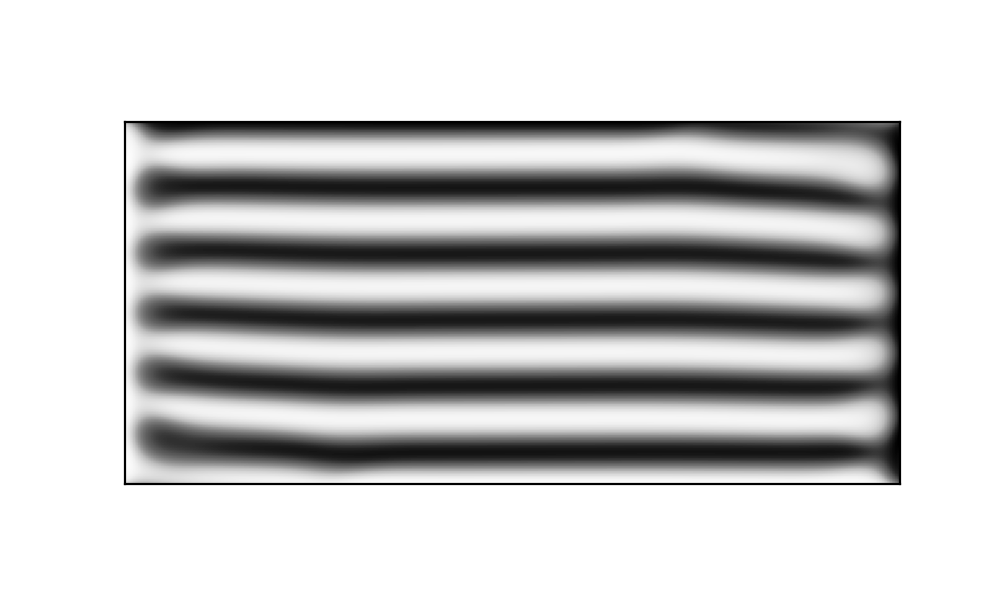

([], [])

In [21]:
con_data = np.load("STXM_Data/Fig1_Images/Sims/mz_averages_anis-x-hard-axis_Bys.npz")

sim_con = con_data['-60']

plt.figure(figsize=(5,3))
plt.imshow(sim_con,cmap='Greys_r')
plt.xticks([])
plt.yticks([])

<IPython.core.display.Javascript object>


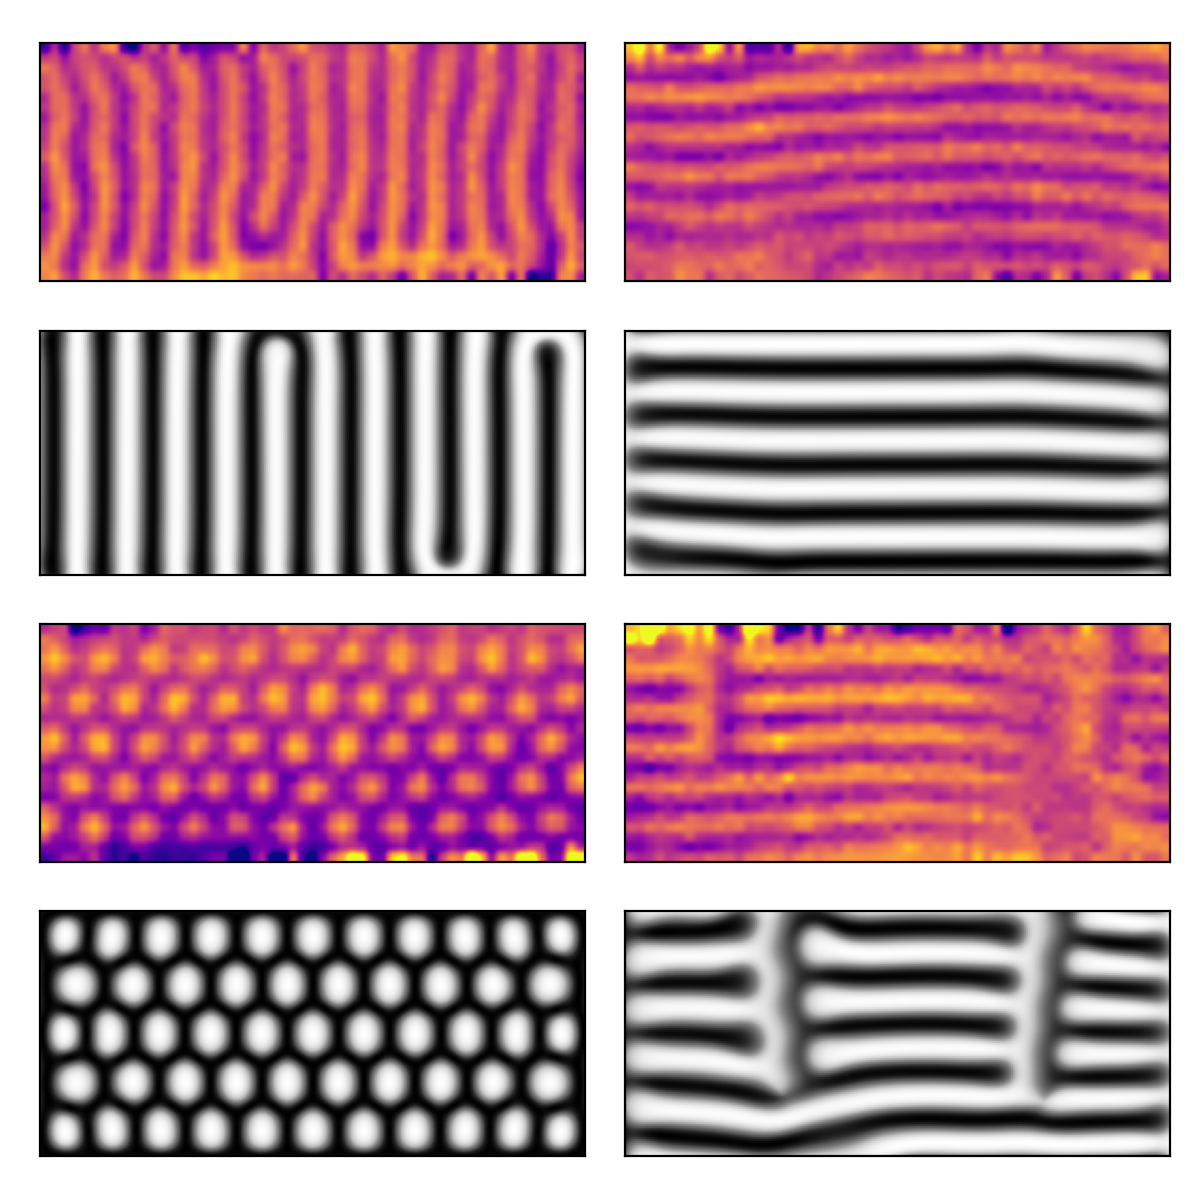

In [29]:
plt.figure(figsize=(6,6))

########################
###### Helical ######
########################

### STXM ###
ax2=plt.subplot2grid((4,2),(0,0), rowspan=1,colspan=1)
plt.imshow(final_Hel[5:-8,65:-65],interpolation='hamming',
           cmap='plasma',  vmax= 1.1, vmin= 0.92)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

### Sim ###
ax2=plt.subplot2grid((4,2),(1,0), rowspan=1,colspan=1)
plt.imshow(sim_heli[5:-5,5:-5],cmap='Greys_r')
plt.xticks([])
plt.yticks([])

########################
###### Conical ######
########################

### STXM ###
ax2=plt.subplot2grid((4,2),(0,1), rowspan=1,colspan=1)
plt.imshow(final_Con[6:-7,65:-65],interpolation='hamming',
           cmap='plasma', vmax= 1.04, vmin= 0.94)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

### Sim ###
ax2=plt.subplot2grid((4,2),(1,1), rowspan=1,colspan=1)
plt.imshow(sim_con[5:-5,5:-5],cmap='Greys_r')
plt.xticks([])
plt.yticks([])


########################
###### SkL ############
########################

### STXM ###
ax2=plt.subplot2grid((4,2),(2,0), rowspan=1,colspan=1)
plt.imshow(final_SkL[8:-5,65:-65],interpolation='hamming',
           cmap='plasma', vmax= 1.04, vmin= 0.90)
plt.xticks([])
plt.yticks([])

### Sim ###
ax2=plt.subplot2grid((4,2),(3,0), rowspan=1,colspan=1)
plt.imshow(sim_SkL[5:-5,5:-5],cmap='Greys_r',interpolation='hamming')
plt.xticks([])
plt.yticks([])

########################
###### SkT ############
########################

### STXM ###
ax2=plt.subplot2grid((4,2),(2,1), rowspan=1,colspan=1)
plt.imshow(final_SkS[4:-9,100:-30],interpolation='hamming',
           cmap='plasma', vmax= 1.04, vmin= 0.96)
plt.xticks([])
plt.yticks([])

### Sim ###
ax2=plt.subplot2grid((4,2),(3,1), rowspan=1,colspan=1)
plt.imshow(sim_SkT[5:-5,5:-5],cmap='Greys_r')
plt.xticks([])
plt.yticks([])

########################
plt.tight_layout()
plt.savefig('Figure_Panels/Fig1_All_States.png',dpi=300)

# Plot Individually

<IPython.core.display.Javascript object>


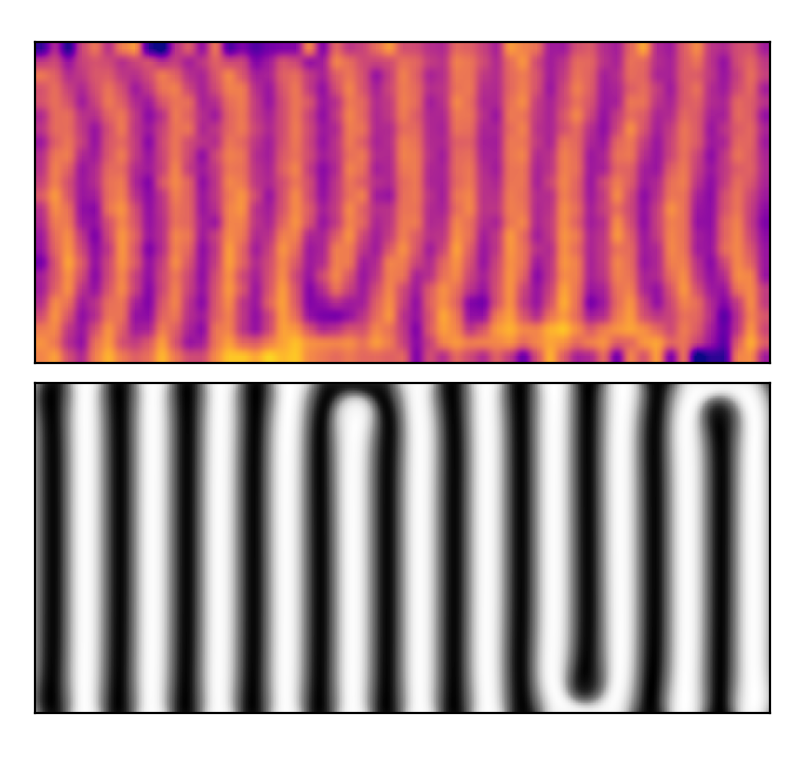

In [30]:
########################
###### Helical ######
########################

plt.figure(figsize=(4,3.8))

### STXM ###
ax2=plt.subplot2grid((2,1),(0,0), rowspan=1,colspan=1)
plt.imshow(final_Hel[5:-8,65:-65],interpolation='hamming',
           cmap='plasma',  vmax= 1.1, vmin= 0.92)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

### Sim ###
ax2=plt.subplot2grid((2,1),(1,0), rowspan=1,colspan=1)
plt.imshow(sim_heli[5:-5,5:-5],cmap='Greys_r')
plt.xticks([])
plt.yticks([])

########################
plt.tight_layout()
plt.subplots_adjust(hspace=0)
plt.savefig('Figure_Panels/Fig1_Helical.png',dpi=300)

<IPython.core.display.Javascript object>


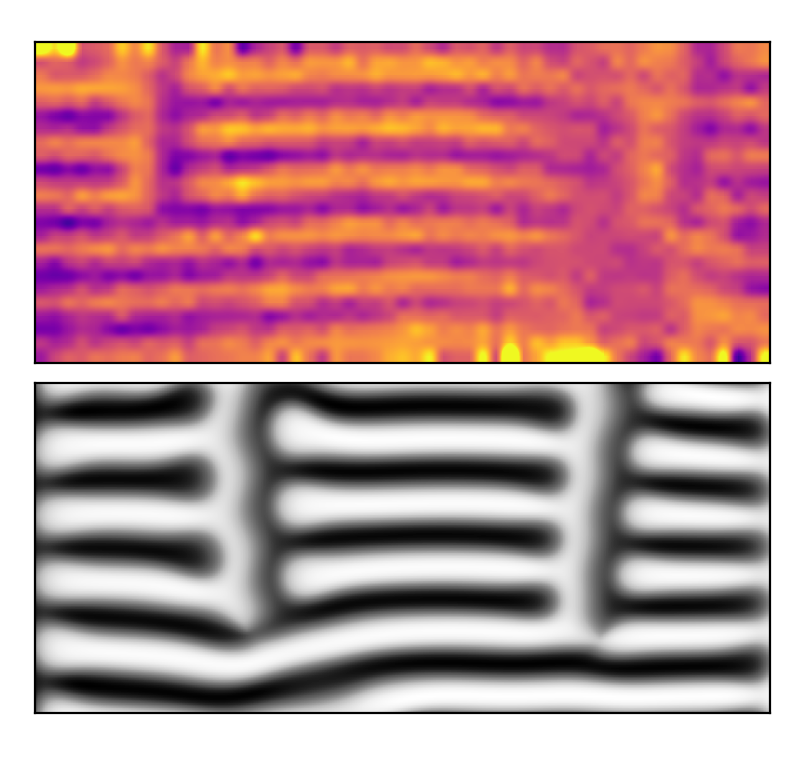

In [31]:
########################
###### SkT ############
########################

plt.figure(figsize=(4,3.8))

### STXM ###
ax2=plt.subplot2grid((2,1),(0,0), rowspan=1,colspan=1)
plt.imshow(final_SkS[5:-8,100:-30],interpolation='hamming',
           cmap='plasma', vmax= 1.04, vmin= 0.96)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

### Sim ###
ax2=plt.subplot2grid((2,1),(1,0), rowspan=1,colspan=1)
plt.imshow(sim_SkT[5:-5,5:-5],cmap='Greys_r')
plt.xticks([])
plt.yticks([])

########################
plt.tight_layout()
plt.subplots_adjust(hspace=0)
plt.savefig('Figure_Panels/Fig1_SkS.png',dpi=300)

<IPython.core.display.Javascript object>


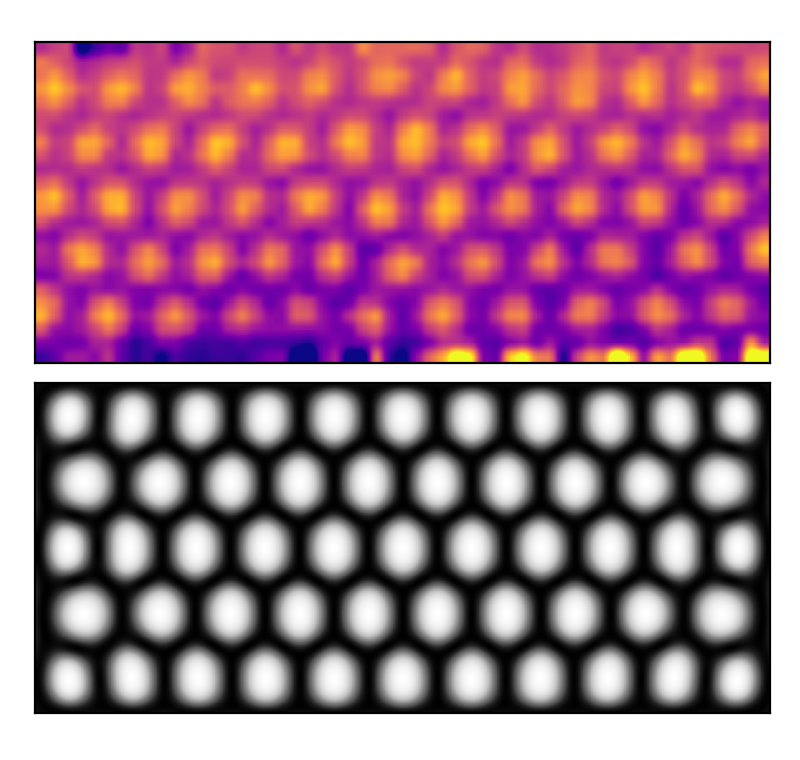

In [32]:
########################
###### SkL ############
########################

plt.figure(figsize=(4,3.8))

### STXM ###
ax2=plt.subplot2grid((2,1),(0,0), rowspan=1,colspan=1)
plt.imshow(final_SkL[8:-5,65:-65],interpolation='hamming',
           cmap='plasma', vmax= 1.04, vmin= 0.90)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

### Sim ###
ax2=plt.subplot2grid((2,1),(1,0), rowspan=1,colspan=1)
plt.imshow(sim_SkL[5:-5,5:-5],cmap='Greys_r',interpolation='hamming')
plt.xticks([])
plt.yticks([])

########################
plt.tight_layout()
plt.subplots_adjust(hspace=0)
plt.savefig('Figure_Panels/Fig1_SkL.png',dpi=300)

<IPython.core.display.Javascript object>


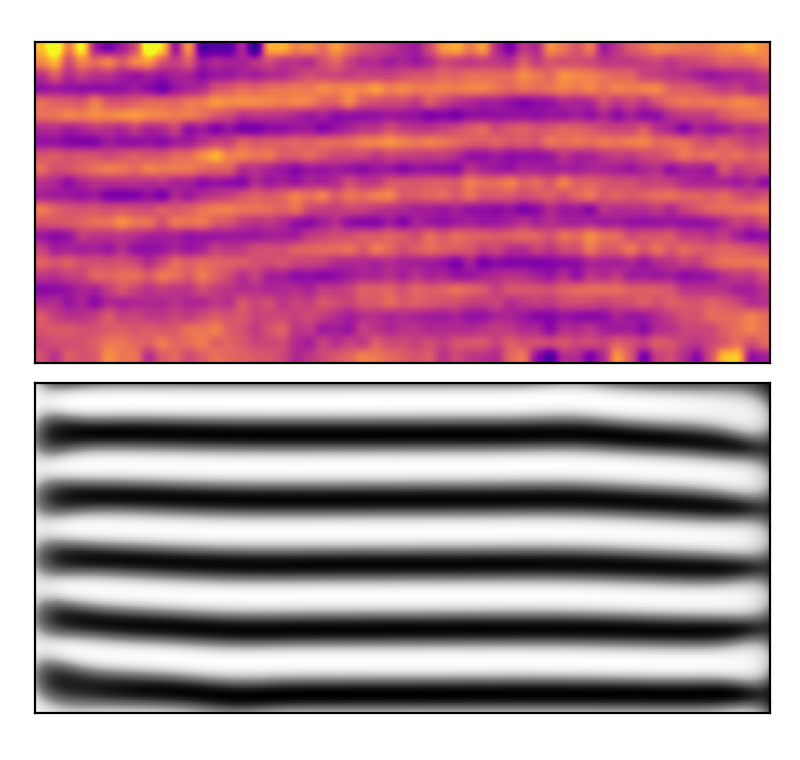

In [33]:
########################
###### Conical #########
########################

plt.figure(figsize=(4,3.8))

### STXM ###
ax2=plt.subplot2grid((2,1),(0,0), rowspan=1,colspan=1)
plt.imshow(final_Con[6:-7,65:-65],interpolation='hamming',
           cmap='plasma', vmax= 1.04, vmin= 0.94)
plt.xticks([])
plt.yticks([])
#plt.colorbar()

### Sim ###
ax2=plt.subplot2grid((2,1),(1,0), rowspan=1,colspan=1)
plt.imshow(sim_con[5:-5,5:-5],cmap='Greys_r')
plt.xticks([])
plt.yticks([])

########################
plt.tight_layout()
plt.subplots_adjust(hspace=0)
plt.savefig('Figure_Panels/Fig1_Cone.png',dpi=300)